# perplexity 评估

衡量模型对测试数据的预测能力，数值越低表示模型性能越好。


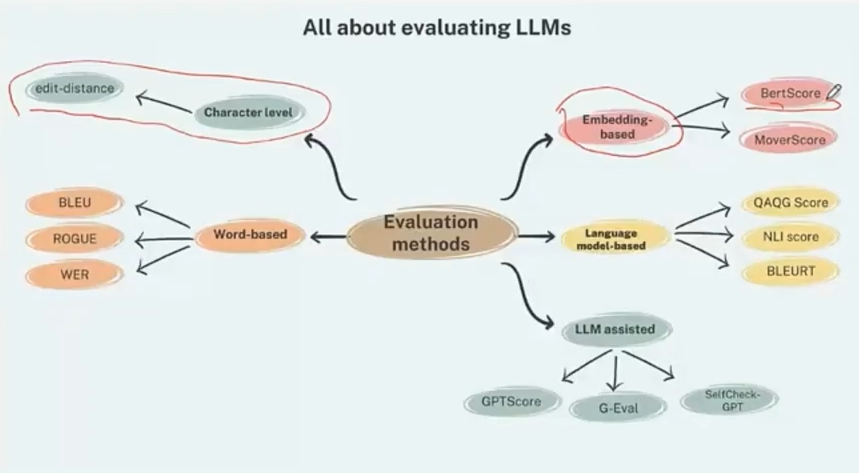


In [2]:
from transformers import AutoModelForCausalLM, AutoTokenizer
from datasets import load_dataset
import torch
import math

# 加载预训练模型和 tokenizer
model_name = "C:/Users/Admin/Desktop/model/qwen/Qwen2___5-0___5B-Instruct"
model = AutoModelForCausalLM.from_pretrained(
    model_name,
    device_map="auto",
    torch_dtype="auto",
)
tokenizer = AutoTokenizer.from_pretrained(model_name)

# 确保 tokenizer 定义了填充标记
tokenizer.pad_token = tokenizer.eos_token
model.config.pad_token_id = model.config.eos_token_id

# 加载评估数据集
data_files = {"test": "C:/Users/Admin/Desktop/Data/huatuo_train.json"}
dataset = load_dataset("json", data_files=data_files, split="test")


# 定义计算困惑度的函数
def compute_perplexity(model, tokenizer, dataset):
    model.eval()
    total_loss = 0.0
    total_length = 0

    for example in dataset:
        for conversation in example["conversations"]:
            if conversation["from"] == "human":
                inputs = tokenizer(
                    conversation["value"],
                    return_tensors="pt",
                    truncation=True,
                    padding=True,
                )
                input_ids = inputs.input_ids.to(model.device)
                attention_mask = inputs.attention_mask.to(model.device)
                with torch.no_grad():
                    outputs = model(
                        input_ids, attention_mask=attention_mask, labels=input_ids
                    )
                    loss = outputs.loss
                    total_loss += loss.item() * input_ids.size(1)
                    total_length += input_ids.size(1)

                    # 生成模型的回答
                    generated_ids = model.generate(input_ids, max_length=50)
                    generated_text = tokenizer.decode(
                        generated_ids[0], skip_special_tokens=True
                    )
                    print("模型输出:", generated_text)

    perplexity = math.exp(total_loss / total_length)
    return perplexity


# 计算困惑度
perplexity = compute_perplexity(model, tokenizer, dataset)
print(f"困惑度: {perplexity}")

Special tokens have been added in the vocabulary, make sure the associated word embeddings are fine-tuned or trained.


模型输出: 曲匹地尔片的用法用量

用于治疗急性胆囊炎，成人一次0.5g，每日2次。对于慢性胆囊炎或伴有其他疾病（如糖尿病、高血压等）的患者，建议在医生
模型输出: 三期梅毒多久能治愈吗

梅毒的治疗时间因人而异，主要取决于感染的具体情况、治疗方法和个体对疾病的反应。一般来说：

1. **早期诊断**：如果在感染后几周内被发现，
模型输出: 肝癌术后饮食注意哪些？，我爸爸最近身体不太好，去医院仔细检查后发觉是得了肺癌。医生说需要有实施手术治疗。但是现在病情已经开始恶化了，已经到了晚期阶段。现在我想为他实施化疗救治
模型输出: 巨肠症的治疗和预防方法
1. 避免食用过多的食物，尤其是容易产气的食物，如豆类、洋葱、大蒜等。
2. 尽量避免饮酒，因为酒精会增加胃酸分泌，
模型输出: 孕妇甲状腺激素低意味着什么？，我妈妈最近总是说身体不舒服，脸色苍白，有时候还会出现胸闷、心慌等症状，去医院检查后才知道是得了甲亢。医生说她可能需要吃药治疗，但是我不知道这个
模型输出: 什么补肾最好？，无

补肾的方法有很多，具体选择哪种方法需要根据个人的体质和具体情况来决定。以下是一些常用的补肾方法：

1. **中药调理**：可以使用一些传统中药如枸杞、
模型输出: 异尖线吸虫蚴移行症的鉴别诊断

一、病因
1. 疟疾：以血中疟原虫为主要传染源，主要通过蚊子叮咬传播。感染后表现为发热、寒战、
模型输出: 妇女得了霉菌性阴道炎怎么办，无

你好，根据你描述的情况来看，霉菌性阴道炎是一种常见的妇科疾病。对于霉菌性阴道炎的治疗，首先需要到医院进行检查确诊，然后遵医嘱
模型输出: 脸上玫瑰痤疮治疗方法有哪些

面部玫瑰痤疮，又称酒渣鼻或粉刺性皮炎，是一种常见的皮肤问题。治疗这种病症需要综合考虑患者的年龄、症状严重程度以及具体病因等因素。以下是一些常用的治疗方法
模型输出: 怀孕后嘴巴很淡怎么办

怀孕期间，女性可能会经历一些生理变化和情绪波动。如果在怀孕后期发现自己的嘴唇变淡，这可能与多种因素有关，包括激素水平的变化、营养状况或个人的健康状况。


模型输出: 甲状腺激素偏低对怀孕有什么影响，无

你好，据你所述的情况，这种情况考虑是属于低血钙的。建议最好是要去医院检查一下血钙的水平,看是否需要补充钙剂.平时要多注意休息,
模型输出: 面部皮炎不想治以后会怎么样
面部长期的皮炎，如果治疗不彻底或